In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
from os import walk
import numpy as np

from img_formation.python.transformImage import *
from img_formation.python.createFigures import *
from img_formation.python.poseVectorToTransformationMatrix import *
from img_formation.python.projectPoints import *

2.2

[[0.   0.   0.   0.   0.   0.   0.04 0.04 0.04 0.04 0.04 0.04 0.08 0.08
  0.08 0.08 0.08 0.08 0.12 0.12 0.12 0.12 0.12 0.12 0.16 0.16 0.16 0.16
  0.16 0.16 0.2  0.2  0.2  0.2  0.2  0.2  0.24 0.24 0.24 0.24 0.24 0.24
  0.28 0.28 0.28 0.28 0.28 0.28 0.32 0.32 0.32 0.32 0.32 0.32]
 [0.   0.04 0.08 0.12 0.16 0.2  0.   0.04 0.08 0.12 0.16 0.2  0.   0.04
  0.08 0.12 0.16 0.2  0.   0.04 0.08 0.12 0.16 0.2  0.   0.04 0.08 0.12
  0.16 0.2  0.   0.04 0.08 0.12 0.16 0.2  0.   0.04 0.08 0.12 0.16 0.2
  0.   0.04 0.08 0.12 0.16 0.2  0.   0.04 0.08 0.12 0.16 0.2 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


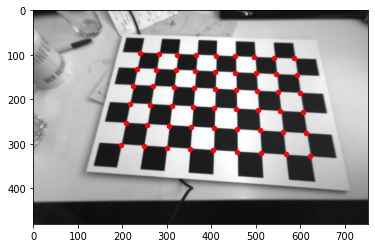

In [10]:
# Load camera poses
# Each row i of matrix 'poses' contains the transformations that transforms
# points expressed in the world frame to points expressed in the camera frame.

pose_vectors = np.loadtxt('img_formation/data/poses.txt')

# Define 3D corner positions
# [Nx3] matrix containing the corners of the checkerboard as 3D points
# (X,Y,Z), expressed in the world coordinate system

k = np.loadtxt('img_formation/data/K.txt')  # calibration matrix [3x3]
d = np.loadtxt('img_formation/data/D.txt')  # distortion coefficients [2x1]

img_idx = 1
path = 'img_formation/data/images_undistorted'
fname = "/img_{:04d}.jpg".format(img_idx)

fnameG= transformTogrey(path, fname)

p_W_corners = create_grid(square_size=0.04, num_corners_x=9, num_corners_y=6)

pose_vec = pose_vectors[img_idx]
RT = poseVectorToTransformationMatrix(pose_vec)  # R|T

ones = np.ones((1, len(p_W_corners[0])))
p_C_corners = np.concatenate((p_W_corners, ones))

projected_points = np.dot(RT, p_C_corners)
xpp, ypp = projectPoints(projected_points, k)

im = plt.imread(fnameG)
implot = plt.imshow(im)
plt.scatter(xpp, ypp, c='r', s=20)
plt.show()

2.3

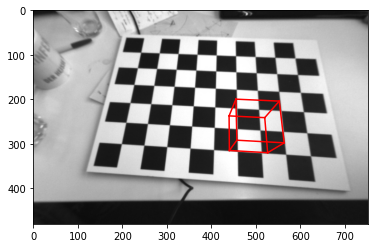

In [6]:
p_W_corners=create_cube(square_size=0.08, offset_x=0.2, offset_y=0.1)
RT = poseVectorToTransformationMatrix(pose_vec)  # R|T
ones = np.ones((1, 8))
p_C_corners = np.concatenate((p_W_corners, ones))
projected_points = np.dot(RT, p_C_corners)
cubepoints = projectPoints(projected_points, k)
im = plt.imread(fnameG)
implot = plt.imshow(im)

# base layer
plt.plot([cubepoints[0][0], cubepoints[0][1]], [cubepoints[1][0], cubepoints[1][1]], "-r")
plt.plot([cubepoints[0][0], cubepoints[0][2]], [cubepoints[1][0], cubepoints[1][2]], "-r")
plt.plot([cubepoints[0][1], cubepoints[0][3]], [cubepoints[1][1], cubepoints[1][3]], "-r")
plt.plot([cubepoints[0][2], cubepoints[0][3]], [cubepoints[1][2], cubepoints[1][3]], "-r")

# top layer
plt.plot([cubepoints[0][0+4], cubepoints[0][1+4]], [cubepoints[1][0+4], cubepoints[1][1+4]], "-r")
plt.plot([cubepoints[0][0+4], cubepoints[0][2+4]], [cubepoints[1][0+4], cubepoints[1][2+4]], "-r")
plt.plot([cubepoints[0][1+4], cubepoints[0][3+4]], [cubepoints[1][1+4], cubepoints[1][3+4]], "-r")
plt.plot([cubepoints[0][2+4], cubepoints[0][3+4]], [cubepoints[1][2+4], cubepoints[1][3+4]], "-r")

# top layer
plt.plot([cubepoints[0][0], cubepoints[0][0+4]], [cubepoints[1][0], cubepoints[1][0+4]], "-r")
plt.plot([cubepoints[0][1], cubepoints[0][1+4]], [cubepoints[1][1], cubepoints[1][1+4]], "-r")
plt.plot([cubepoints[0][2], cubepoints[0][2+4]], [cubepoints[1][2], cubepoints[1][2+4]], "-r")
plt.plot([cubepoints[0][3], cubepoints[0][3+4]], [cubepoints[1][3], cubepoints[1][3+4]], "-r")

plt.show()

3.2

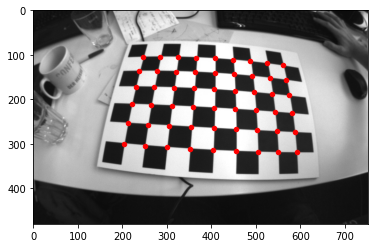

In [8]:
img_idx = 1
path = 'img_formation/data/images'
fname = "/img_{:04d}.jpg".format(img_idx)

fnameG= transformTogrey(path, fname)

p_W_corners = create_grid(square_size=0.04, num_corners_x=9, num_corners_y=6)

pose_vec = pose_vectors[img_idx]
RT = poseVectorToTransformationMatrix(pose_vec)  # R|T

ones = np.ones((1, len(p_W_corners[0])))
p_C_corners = np.concatenate((p_W_corners, ones))

projected_points = np.dot(RT, p_C_corners)
xpp, ypp = projectPoints(projected_points, k, [*d, 0, 0])

im = plt.imread(fnameG)
implot = plt.imshow(im)
plt.scatter(xpp, ypp, c='r', s=20)
plt.show()

3.3

In [6]:
def all_files(path) :
    names = []
    for files in walk(path):
        names.append(files)
    return names[0][2]

In [ ]:
#undistort images
pathD = 'img_formation/data/images'
path = 'img_formation/data/images_undistorted'
num = len(all_files(pathD))
img_idx = 1

for i in range(num-1) :
    fname = "/img_{:04d}.jpg".format(img_idx)
    fnameG= transformTogrey(pathD, fname)
    undistortImage(fnameG, k, d, path)
    img_idx += 1